# DataScience4Covid

## Work made by: Francisco Pereira, Gil Afonso, Miguel Dias, Samuel Alves

This work is part of a task with the intention to use Machine Learning on Covid-19 datasets.

### Introduction
Covid-19 is the disease caused by the virus SARS-CoV-2.
The main goal of this work is to predict deaths caused by Covid-19 in the United States of America with machine learning and use the model created to try and predict the influenza deaths.

The work consiste in using 2 datasets: the main one which has data for every state in the USA containing number of deaths by Covid-19, Influenza and Pneumonia with their age group and week, on which will be used the model previously built. The second one has data about deaths of Covid-19 and will be used to build the model.



Start by importing the packages needed.

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.colors as mcolors


We will start by analysing the main dataset so we have to start by opening it.

In [8]:
data = pd.read_csv('Provisional_Death_Counts_for_Influenza__Pneumonia__and_COVID-19.csv',sep=',', index_col = 0, na_values = "na")
print (data.shape)
data.head

(10836, 15)


<bound method NDFrame.head of             Start Week    End Week  MMWRyear  MMWRweek    Group    Indicator  \
Data As Of                                                                     
11/25/2020  02/01/2020  02/01/2020      2020         5  By week  Week-ending   
11/25/2020  02/01/2020  02/01/2020      2020         5  By week  Week-ending   
11/25/2020  02/01/2020  02/01/2020      2020         5  By week  Week-ending   
11/25/2020  02/01/2020  02/01/2020      2020         5  By week  Week-ending   
11/25/2020  02/01/2020  02/01/2020      2020         5  By week  Week-ending   
...                ...         ...       ...       ...      ...          ...   
11/25/2020  11/21/2020  11/21/2020      2020        47  By week  Week-ending   
11/25/2020  11/21/2020  11/21/2020      2020        47  By week  Week-ending   
11/25/2020  11/21/2020  11/21/2020      2020        47  By week  Week-ending   
11/25/2020  11/21/2020  11/21/2020      2020        47  By week  Week-ending   
11/25/2020

As seen, the dataset contains 10836 rows and 15 columns

In [9]:
data.describe()


,MMWRyear,MMWRweek,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Influenza Deaths,Pneumonia or Influenza,"Pneumonia, Influenza, or COVID-19 Deaths"
count,10836.0,10836.000000,9114.000000,9716.000000,8917.000000,8401.000000,8897.000000,9065.000000
mean,2020.0,26.000000,157.071758,1589.344998,161.858024,4.072372,166.812409,249.488252
std,0.0,12.410246,707.549047,5318.890128,578.399546,27.793888,593.282163,954.621799
min,2020.0,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,15.000000,0.000000,88.000000,0.000000,0.000000,0.000000,10.000000
50%,2020.0,26.000000,13.000000,386.000000,32.000000,0.000000,34.000000,44.000000
75%,2020.0,37.000000,78.000000,1207.250000,107.000000,0.000000,111.000000,158.000000
max,2020.0,47.000000,17068.000000,78821.000000,11972.000000,654.000000,12444.000000,21222.000000


We can see that by the count some values are missing

In [12]:
data.columns

Index(['Start Week', 'End Week', 'MMWRyear', 'MMWRweek', 'Group', 'Indicator',
       'Jurisdiction', 'Age Group', 'COVID-19 Deaths', 'Total Deaths',
       'Pneumonia Deaths', 'Influenza Deaths', 'Pneumonia or Influenza',
       'Pneumonia, Influenza, or COVID-19 Deaths', 'Footnote'],
      dtype='object')

A simpler way to see all the columns

In [13]:
data.groupby("COVID-19 Deaths").size()

COVID-19 Deaths
0.0        4146
1.0           3
2.0           9
3.0           6
4.0           7
           ... 
13139.0       1
13841.0       1
15426.0       1
16162.0       1
17068.0       1
Length: 906, dtype: int64

To see how many null values we have we use:

In [14]:
data.isnull().sum().sum()

16040

And to dellete them:

In [15]:
datanull=data.dropna()
datanull.isnull().sum().sum()

0

In [16]:
data.groupby("Start Week").size()

#len(data.groupby("Start Week"))

Start Week
02/01/2020    252
02/08/2020    252
02/15/2020    252
02/22/2020    252
02/29/2020    252
03/07/2020    252
03/14/2020    252
03/21/2020    252
03/28/2020    252
04/04/2020    252
04/11/2020    252
04/18/2020    252
04/25/2020    252
05/02/2020    252
05/09/2020    252
05/16/2020    252
05/23/2020    252
05/30/2020    252
06/06/2020    252
06/13/2020    252
06/20/2020    252
06/27/2020    252
07/04/2020    252
07/11/2020    252
07/18/2020    252
07/25/2020    252
08/01/2020    252
08/08/2020    252
08/15/2020    252
08/22/2020    252
08/29/2020    252
09/05/2020    252
09/12/2020    252
09/19/2020    252
09/26/2020    252
10/03/2020    252
10/10/2020    252
10/17/2020    252
10/24/2020    252
10/31/2020    252
11/07/2020    252
11/14/2020    252
11/21/2020    252
dtype: int64

Each state is used 172 times:

In [17]:
data.groupby("Jurisdiction").size()

Jurisdiction
Alabama          172
Alaska           172
Arizona          172
Arkansas         172
California       172
                ... 
Virginia         172
Washington       172
West Virginia    172
Wisconsin        172
Wyoming          172
Length: 63, dtype: int64

To see the states in an easier way:

In [14]:
data.Jurisdiction.unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'New York City', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'HHS Region 1', 'HHS Region 2', 'HHS Region 3',
       'HHS Region 4', 'HHS Region 5', 'HHS Region 6', 'HHS Region 7',
       'HHS Region 8', 'HHS Region 9', 'HHS Region 10'], dtype=object)

In [15]:
data.groupby("Age Group").size()

Age Group
0-17 years     2709
18-64 years    2709
65+ years      2709
All Ages       2709
dtype: int64

Dividing 2709 (how often each age group is used) by 63 (the number of states (although the states are less (50), we have 1 United States, 2 more states than the official ones, and 10 HHS Regions) equal the number of week that is confirmed by using:
```
len(data.groupby("Start Week"))
```

In [16]:
data.groupby("Age Group").count()

,Start Week,End Week,MMWRyear,MMWRweek,Group,Indicator,Jurisdiction,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Influenza Deaths,Pneumonia or Influenza,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
Age Group,,,,,,,,,,,,,,
0-17 years,2709,2709,2709,2709,2709,2709,2709,2528,1616,2168,2543,2100,2015,1685
18-64 years,2709,2709,2709,2709,2709,2709,2709,1942,2692,1852,2075,1883,2003,1566
65+ years,2709,2709,2709,2709,2709,2709,2709,2314,2703,2412,1899,2422,2494,1240
All Ages,2709,2709,2709,2709,2709,2709,2709,2330,2705,2485,1884,2492,2553,1211


Now we will analyze the second dataset which will be composed of other datasets.

In [17]:
new_data = pd.read_csv('COVID19_line_list_data.csv',sep=',', index_col = 0, na_values = "na")
print (new_data.shape)
new_data.tail()

(1085, 26)


,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
id,,,,,,,,,,,,,,,,,,,,,
1081,2.0,2/25/2020,NaN,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,NaN,...,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...,NaN,NaN,NaN,NaN,NaN,NaN
1082,1.0,2/24/2020,NaN,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,NaN,...,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...,NaN,NaN,NaN,NaN,NaN,NaN
1083,1.0,2/26/2020,NaN,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,NaN,...,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...,NaN,NaN,NaN,NaN,NaN,NaN
1084,1.0,2/25/2020,NaN,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,NaN,...,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...,NaN,NaN,NaN,NaN,NaN,NaN
1085,1.0,2/25/2020,NaN,new COVID-19 patient confirmed in Switzerland:...,Bern,Switzerland,male,70.0,2/17/2020,NaN,...,0,NaN,Reuters,https://www.reuters.com/article/uk-switzerland...,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
new_data.describe()

,case_in_country,Unnamed: 3,age,If_onset_approximated,visiting Wuhan,from Wuhan,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
count,888.000000,0.0,843.000000,560.000000,1085.000000,1081.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,48.841216,NaN,49.483689,0.042857,0.176959,0.144311,NaN,NaN,NaN,NaN,NaN,NaN
std,78.853528,NaN,18.255334,0.202716,0.381810,0.351567,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,0.250000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,11.000000,NaN,35.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,28.000000,NaN,51.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,67.250000,NaN,64.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,1443.000000,NaN,96.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


These are the columns of this dataset:

In [19]:
new_data.columns

Index(['case_in_country', 'reporting date', 'Unnamed: 3', 'summary',
       'location', 'country', 'gender', 'age', 'symptom_onset',
       'If_onset_approximated', 'hosp_visit_date', 'exposure_start',
       'exposure_end', 'visiting Wuhan', 'from Wuhan', 'death', 'recovered',
       'symptom', 'source', 'link', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

Some columns are totally empty for example Unnamed: 25 from the data set latest_data as shown bellow:

In [20]:
new_data["Unnamed: 25"].unique()

array([nan])

In [21]:
new_data.isnull().sum().sum()

12368

To change nan values to '' :

In [22]:
new_data = new_data.replace(np.nan, '', regex=True)
new_data.head()

,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
id,,,,,,,,,,,,,,,,,,,,,
1,,1/20/2020,,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66,01/03/20,0,...,0,,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,,,,,,
2,,1/20/2020,,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56,1/15/2020,0,...,0,,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,,,,,,
3,,1/21/2020,,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46,01/04/20,0,...,0,,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,,,,,,
4,,1/21/2020,,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60,,,...,0,,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,,,,,,
5,,1/21/2020,,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58,,,...,0,,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,,,,,,


Since there are columns without values that are the same, just changing the names, to make it easier it can be transformed in a single column called unnamed that has the first day as a value.

In [23]:
unnamed = new_data.columns[20:]
unnamed

Index(['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

In [24]:
np.delete(new_data, np.s_[26:], 1) #não sei porquê não me deixa selecionar [20:]
new_data.head()

,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
id,,,,,,,,,,,,,,,,,,,,,
1,,1/20/2020,,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66,01/03/20,0,...,0,,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,,,,,,
2,,1/20/2020,,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56,1/15/2020,0,...,0,,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,,,,,,
3,,1/21/2020,,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46,01/04/20,0,...,0,,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,,,,,,
4,,1/21/2020,,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60,,,...,0,,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,,,,,,
5,,1/21/2020,,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58,,,...,0,,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,,,,,,


In [25]:
new_data.groupby("gender").size()

gender
          183
female    382
male      520
dtype: int64

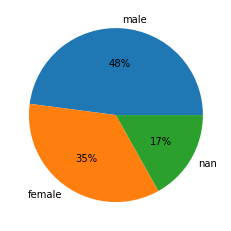

In [26]:
mf = ['male','female','nan']
frac = [520,382,183]
plt.pie(frac,labels=mf,autopct='%.0f%%')
plt.show()

In [28]:
new_data.groupby("age").size()

age
0.25      1
0.5       1
1.0       1
2.0       3
4.0       2
       ... 
87.0      1
89.0      3
91.0      1
96.0      1
        242
Length: 86, dtype: int64

<AxesSubplot:>

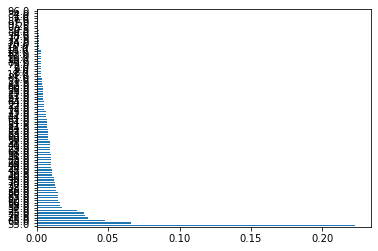

In [40]:
new_data.age.value_counts(normalize=True).plot.barh()


In [65]:
new_data['gender_rate']=np.where(new_data.gender=='male',1,0)
new_data.gender_rate.value_counts()

0    565
1    520
Name: gender_rate, dtype: int64

Now we will analyze the second dataset.

The data was obtained from this website: https://covidtracking.com/data/download


First we need to open it:

In [23]:
data2 = pd.read_csv('all-states-history.csv',sep=',', index_col = 0, na_values = "na")
print (data2.shape)
data2.head

(16427, 41)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<bound method NDFrame.head of            state dataQualityGrade   death  deathConfirmed  deathIncrease  \
date                                                                       
2020-12-20    AK                A   184.0           184.0              0   
2020-12-20    AL                A  4389.0          3849.0              0   
2020-12-20    AR               A+  3237.0          2842.0             46   
2020-12-20    AS                D     0.0             NaN              0   
2020-12-20    AZ               A+  7971.0          7277.0             34   
...          ...              ...     ...             ...            ...   
2020-01-17    WA              NaN     NaN             NaN              0   
2020-01-16    WA              NaN     NaN             NaN              0   
2020-01-15    WA              NaN     NaN             NaN              0   
2020-01-14    WA              NaN     NaN             NaN              0   
2020-01-13    WA              NaN     NaN             NaN 

A small analysis of the dataset:

In [24]:
data2.describe()

,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
count,15591.000000,7165.000000,16427.000000,5494.000000,9966.000000,9966.000000,13258.000000,16427.000000,2868.000000,8301.000000,...,1.635800e+04,16427.000000,3241.000000,1487.000000,1356.000000,614.000000,7.002000e+03,1.642700e+04,1.103300e+04,1.642700e+04
mean,2635.069399,2833.454013,18.837828,263.481070,8589.350793,8589.350793,1006.012294,39.195349,1452.472106,319.685098,...,1.311286e+06,14128.145979,127411.668004,103354.531944,122769.369469,79489.757329,7.094130e+05,2.699545e+03,1.499615e+06,1.110010e+04
std,4640.301576,3220.387245,44.567271,380.772274,15494.633634,15494.633634,1674.042619,226.412294,1420.254034,515.323747,...,2.606745e+06,26411.991794,152998.621227,155539.880005,147057.991688,75040.582297,1.013361e+06,2.500635e+04,2.692379e+06,3.707658e+04
min,0.000000,0.000000,-201.000000,0.000000,1.000000,1.000000,0.000000,-4124.000000,6.000000,0.000000,...,0.000000e+00,-194215.000000,5.000000,2.000000,1.000000,3.000000,0.000000e+00,-1.122327e+06,0.000000e+00,-5.819440e+05
25%,104.000000,459.000000,0.000000,45.000000,720.250000,720.250000,145.000000,0.000000,387.750000,61.000000,...,5.897250e+04,853.500000,14418.000000,16981.000000,34292.000000,14213.000000,1.256398e+05,0.000000e+00,1.029770e+05,0.000000e+00
50%,704.000000,1825.000000,5.000000,152.000000,3272.500000,3272.500000,485.500000,0.000000,1013.000000,155.000000,...,3.997145e+05,5002.000000,60293.000000,45253.000000,69859.500000,63003.500000,3.273410e+05,0.000000e+00,5.197770e+05,1.064000e+03
75%,2990.000000,3802.000000,18.000000,273.000000,10037.750000,10037.750000,1083.000000,33.000000,1935.000000,332.000000,...,1.379134e+06,15395.000000,198745.000000,123242.000000,127372.000000,126981.750000,9.067368e+05,2.478000e+03,1.693858e+06,1.030450e+04
max,28598.000000,16286.000000,951.000000,1908.000000,89995.000000,89995.000000,18825.000000,16373.000000,7050.000000,5225.000000,...,2.946517e+07,371222.000000,650372.000000,983430.000000,630838.000000,321267.000000,8.223154e+06,8.982590e+05,2.946517e+07,2.352923e+06


In [25]:
data2.columns

Index(['state', 'dataQualityGrade', 'death', 'deathConfirmed', 'deathIncrease',
       'deathProbable', 'hospitalized', 'hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'negative', 'negativeIncrease',
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody',
       'negativeTestsViral', 'onVentilatorCumulative', 'onVentilatorCurrently',
       'positive', 'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsVi

A simpler way to see all the columns

We will need to delete some columns since some of them have no interest for our work with the main dataset.
To identify which one to delete the following link will be used: https://covidtracking.com/about-data/data-definitions

The columns deleted will be:

In [27]:
data2.drop(['dataQualityGrade','deathConfirmed','deathIncrease','deathProbable','hospitalized','hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'negative', 'negativeIncrease',
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen','onVentilatorCumulative',
       'onVentilatorCurrently', 'positiveCasesViral',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease','totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralIncrease'], axis=1, inplace=True)

As such, this dataset will be composed of these columns:

In [30]:
data2.columns

Index(['state', 'death', 'negativeTestsViral', 'positive', 'positiveIncrease',
       'totalTestResults'],
      dtype='object')